# Car Project

Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

S.No.: Serial number
Name: Name of the car which includes brand name and model name
Location: Location in which the car is being sold or is available for purchase
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in dollars
Price: The price of the used car in dollars

Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("used_cars_data.csv")

In [3]:
#To check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [4]:
#to check the haed of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


### Data cleaning

In [5]:
#To check for the missing value
df[df.isnull().any(axis=1)]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,NaN,5.0,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,NaN,5.0,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,NaN,5.0,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,NaN,5.0,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.230,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.150,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.470,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.150,NaN


In [6]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [7]:
#To check for the percentage value of the missing value(nan) present in each column of the dataset
#To make a list of the features with the missing value
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

#To calculate the percentage of the missing value
for feature in features_with_nan:
    missing_percentage = np.round((df[feature].isnull().mean())  * 100, 2)
    
#To Print the feature name and its percentage of missing values
    print(f"{feature}: {missing_percentage}% missing values")

Mileage: 0.03% missing values
Engine: 0.63% missing values
Power: 2.41% missing values
Seats: 0.73% missing values
Price: 17.01% missing values


##### From result above we have 5 features with missing value, since the missing value have less significant impact on the dataset, the dataset will be removed

dropping the missing vaslues in the column Mileage,Engine, Power, Seats

In [8]:
#To remove the missing value
df.dropna(subset=['Mileage'], inplace = True)

In [9]:
df.dropna(subset=['Engine'], inplace = True)
df.dropna(subset=['Power'], inplace = True)
df.dropna(subset=['Seats'], inplace = True)

In [10]:
#To reset the index of the data
df.reset_index(drop=True, inplace=True)

In [11]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1201
dtype: int64

##### Note:The missing value of the Price will be removed because that is the Target variable and will affect the building of the machine learnig

In [12]:
df['Price'].unique()

array([ 1.75, 12.5 ,  4.5 , ..., 17.56,  7.43,   nan])

In [13]:
df= df.dropna(subset=['Price'])

In [14]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [15]:
#To drop unwanted column
df.drop(columns=['S.No.'], axis=1, inplace=True)

### Numerical Variables

In [16]:
# To show list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,Year,Kilometers_Driven,Seats,New_Price,Price
0,2010,72000,5.0,5.51,1.75
1,2015,41000,5.0,16.06,12.50
2,2011,46000,5.0,8.61,4.50
3,2012,87000,7.0,11.27,6.00
4,2013,40670,5.0,53.14,17.74


##### Datetime Variables

In [17]:
#To explore the year variable
df['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2004, 2002, 2000, 2005, 2003, 1999, 1998, 2001],
      dtype=int64)

Text(0.5, 1.0, 'Car Price vs Year')

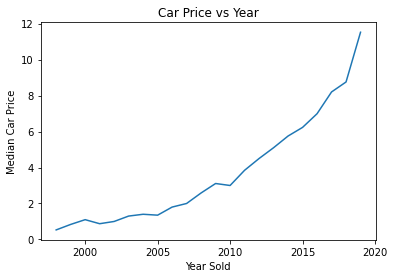

In [18]:
## To check whether there is a relation between year of the car and the price

df.groupby('Year')['Price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Car Price')
plt.title("Car Price vs Year")

The visual analysis reveals a positive correlation between the year of manufacture of the car and its price, indicating that newer cars tend to have higher prices

#### Categorical Variables

In [19]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

In [20]:
#To show the number of categories in the categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Name and number of categories are 1811
The feature is Location and number of categories are 11
The feature is Fuel_Type and number of categories are 4
The feature is Transmission and number of categories are 2
The feature is Owner_Type and number of categories are 4
The feature is Mileage and number of categories are 440
The feature is Engine and number of categories are 139
The feature is Power and number of categories are 370


### Analysis of the Name

In [21]:
df['Name'].unique

<bound method Series.unique of 0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
5867                    Maruti Swift VDI
5868            Hyundai Xcent 1.1 CRDi S
5869               Mahindra Xylo D4 BSIV
5870                  Maruti Wagon R VXI
5871               Chevrolet Beat Diesel
Name: Name, Length: 5872, dtype: object>

In [22]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Ritz VDi                        30
                                       ..
Hyundai i20 2015-2017 1.4 Magna ABS     1
Ford EcoSport 1.5 Petrol Trend          1
Volvo XC90 2007-2015 D5 AWD             1
Mahindra Scorpio S2 7 Seater            1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1811, dtype: int64

In [23]:
#Extracing only the first name in the Name column

df['New_Name'] = df['Name'].str.split(' ').str[0]  # Extract brand name

In [24]:
df['New_Name'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: New_Name, dtype: int64

In [25]:
# set threshold to 300
threshold = 200

# get the value count of platforms
Brand = df["New_Name"].value_counts()


# filter the New Name to only those with at least 300 occurrence
new_brand_list = Brand[Brand.values >= threshold].index.tolist()

In [26]:
print(new_brand_list)

['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen', 'Ford', 'Mahindra', 'BMW', 'Audi']


In [27]:
# to replace the remaing with others 
brand_val = []

# Iterate over each row in the dataframe
for i in range(df.shape[0]):

   #  getting the values in plat from  column
    txt = df.New_Name.values[i] 
    
     # Initialize flag variable to 0
    flag = 0  

    # Iterate over the new_platforms list
    for item in new_brand_list:  
        # If the item is in the current row and flag is 0, append the item to platform_vals
        if item in txt and flag == 0:  
            brand_val.append(item)
            flag = 1

    # If the flag is 0, the row value is not in the new platforms list. Append "Others" to platform_vals
    if flag == 0:  
        brand_val.append("Others")

In [28]:
# creating a new column from exiting column

df["Car_Name"] = brand_val

In [29]:
df["Car_Name"].value_counts()

Maruti           1175
Hyundai          1058
Others            956
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Name: Car_Name, dtype: int64

In [30]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,New_Name,Car_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi,Audi


In [31]:
 # Drop the 'Brand_Name' column
    
df = df.drop(['Name','New_Name'], axis=1)
#df = df.copy()
#df_copy = df_copy.drop(['Name','New_Name'], axis=1)

In [32]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi


#### Analysis of Location

In [33]:
location_names=df.Location.value_counts().index

In [34]:
location_names

Index(['Mumbai', 'Hyderabad', 'Kochi', 'Coimbatore', 'Pune', 'Delhi',
       'Kolkata', 'Chennai', 'Jaipur', 'Bangalore', 'Ahmedabad'],
      dtype='object')

In [35]:
location_value=df.Location.value_counts().values
location_value

array([775, 718, 645, 629, 594, 545, 521, 476, 402, 347, 220], dtype=int64)

([<matplotlib.patches.Wedge at 0x276867415c8>,
 [Text(1.0067899581592816, 0.44314103866560633, 'Mumbai'),
  Text(0.3848116405781689, 1.0304950272929698, 'Hyderabad'),
  Text(-0.3996567105425854, 1.0248290168209917, 'Kochi'),
  Text(-0.9560423289173583, 0.5440432568447788, 'Coimbatore'),
  Text(-1.0896987257518573, -0.15018883811648062, 'Pune'),
  Text(-0.8075949886474699, -0.7468536230825241, 'Delhi'),
  Text(-0.27654479468515214, -1.0646703605025112, 'Kolkata'),
  Text(0.3032261454121656, -1.0573806810881692, 'Chennai'),
  Text(0.7490112731175573, -0.8055942606193368, 'Jaipur'),
  Text(1.0039241333355917, -0.4495957456497797, 'Bangalore'),
  Text(1.0923891153017071, -0.12917438124625943, 'Ahmedabad')],
 [Text(0.5491581589959716, 0.24171329381760343, '13.20%'),
  Text(0.20989725849718302, 0.5620881967052561, '12.23%'),
  Text(-0.21799456938686476, 0.5589976455387227, '10.98%'),
  Text(-0.5214776339549226, 0.2967508673698793, '10.71%'),
  Text(-0.5943811231373767, -0.08192118442717124, 

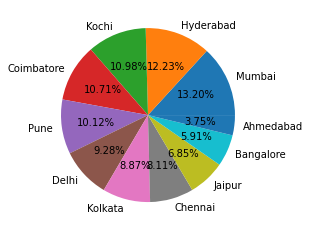

In [36]:
plt.pie(location_value,labels=location_names,autopct='%1.2f%%')

As per the visualization, Mumbai exhibits the highest percentage of cars available for sale or purchase at 13.21%, followed by Hyderabad at 12.02%. In contrast, Bangalore has the lowest representation, accounting for just 5.97% of the total

### Data Visualization

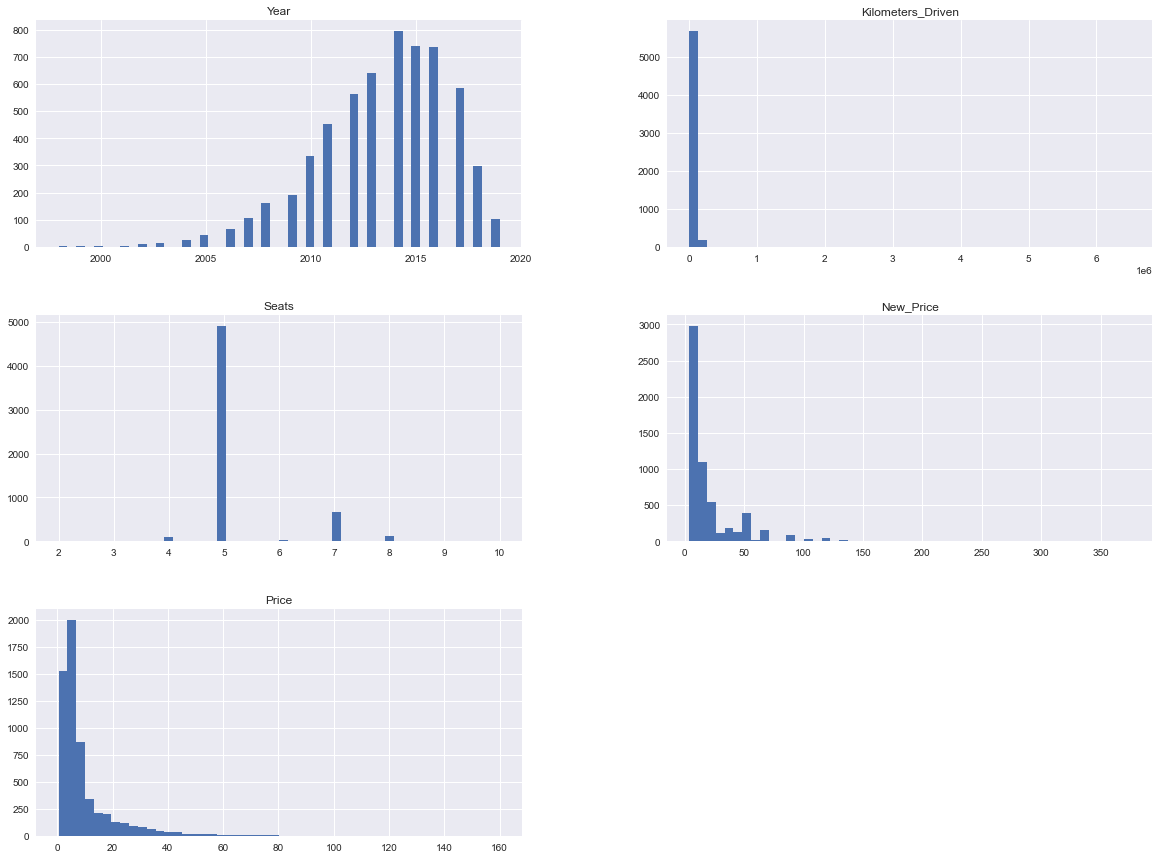

In [37]:
#To do some visualization
#sns.pairplot(df)
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

Based on the visualization, it is evident that the distributions of kilometers driven, new price, and price are not normally distributed; instead, they exhibit a right-skewed (positively skewed) pattern

In [38]:
#To check for coreelation
df.corr()

,Year,Kilometers_Driven,Seats,New_Price,Price
Year,1.000000,-0.169369,0.007833,-0.018054,0.299475
Kilometers_Driven,-0.169369,1.000000,0.083072,0.018680,-0.008249
Seats,0.007833,0.083072,1.000000,0.044546,0.055547
New_Price,-0.018054,0.018680,0.044546,1.000000,0.763261
Price,0.299475,-0.008249,0.055547,0.763261,1.000000


<AxesSubplot:>

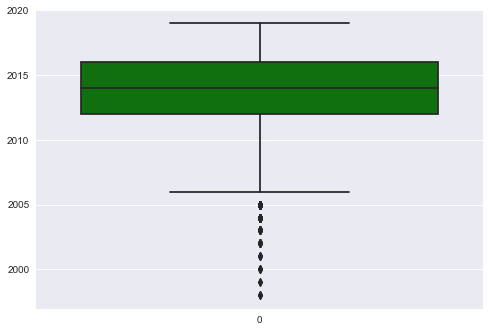

In [39]:
#to check for outliers
sns.boxplot(df['Year'], color='green')

In [40]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi


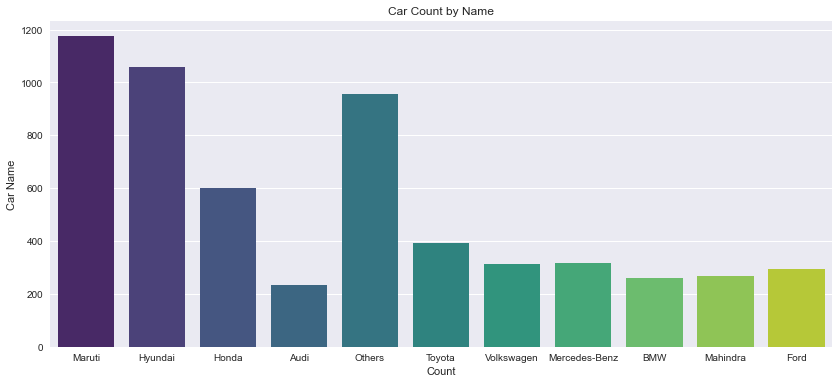

In [41]:
# Bar plot for 'Car_Name'
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Car_Name', palette='viridis', orient='v')
plt.title('Car Count by Name')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()

From the visualization, it's evident that the most prevalent car available for purchase is "Maruti," while "Skoda" appears to be the least common choice among the available cars.

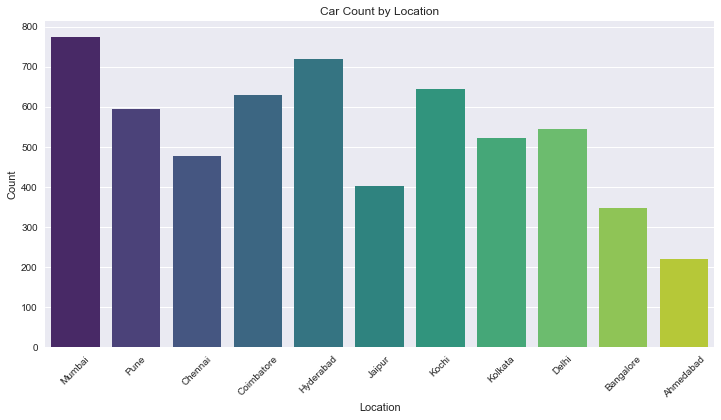

In [42]:
# Bar plot for 'Location'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', palette='viridis')
plt.title('Car Count by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Text(0.5, 1.0, 'Transmision analysis by the car year')

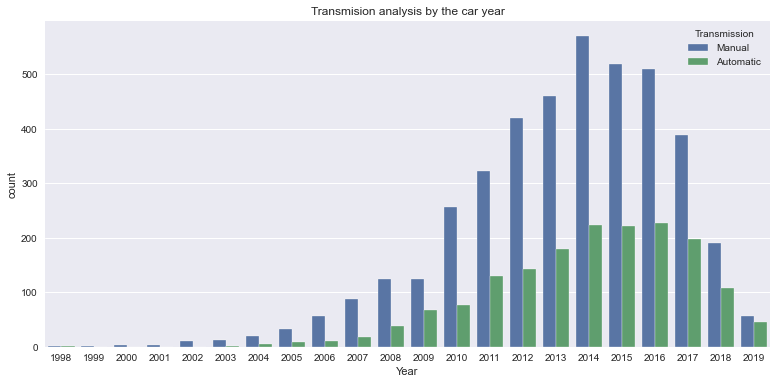

In [43]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x="Year" , hue = 'Transmission', data = df)
plt.title('Transmision analysis by the car year') #weight='bold')

The visualizations indicate a predominant presence of cars with manual transmission, with a notable concentration of vehicles manufactured in 2014. Among the automatic transmission cars, those from the 2014 model year exhibit the highest count, whereas for manual transmissions, the 2015 model year cars take the lead.

Text(0.5, 1.0, 'Fuel Type analysis by the car year')

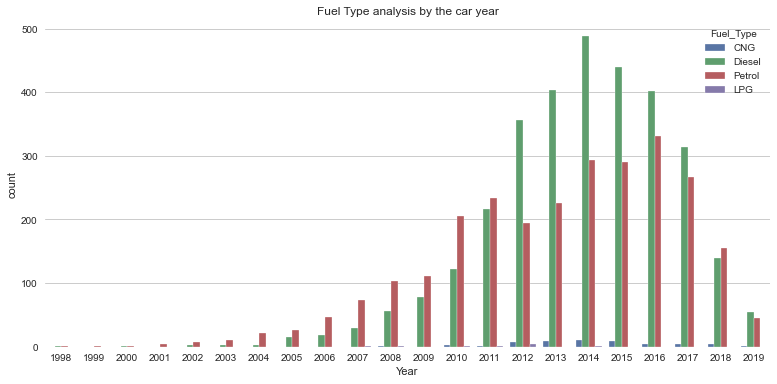

In [44]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x="Year" , hue = 'Fuel_Type', data = df)
plt.title('Fuel Type analysis by the car year')

The visualization clearly illustrates that the majority of cars use diesel as their primary fuel source, followed by petrol. A smaller portion of vehicles relies on CNG, and only a negligible fraction opts for LPG as their fuel type.

Text(0.5, 1.0, 'Owner type analysis by Location')

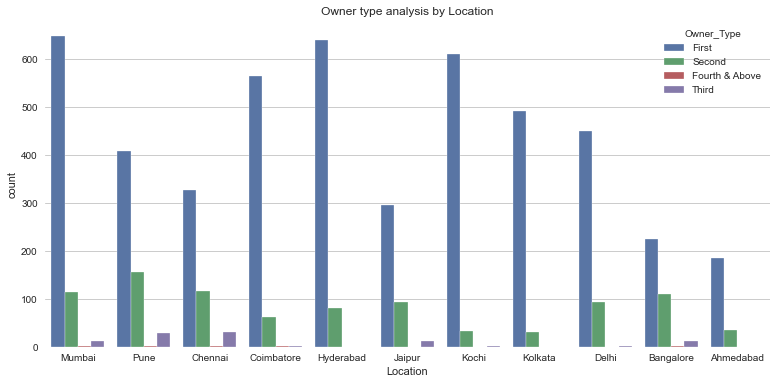

In [45]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x="Location" , hue = 'Owner_Type', data = df)
plt.title('Owner type analysis by Location')

The visualization reveals that Mumbai has the highest number of first-time car users, followed by Hyderabad. Pune, on the other hand, boasts the highest count of second-time car users. In contrast, the number of third and fourth-time car users in these locations is notably smaller

In [46]:
def plot(data, x_column, hue_column, figsize=(13, 6), style='whitegrid', title=None):
    plt.subplots(figsize=figsize)
    sns.set_style(style)
    sns.countplot(x=x_column, hue=hue_column, data=data)
    
    if title:
        plt.title(title)
    
    plt.show()

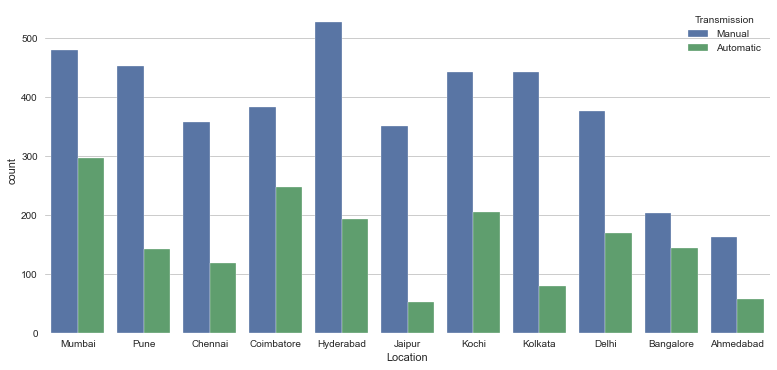

In [47]:
plot(df, 'Location', 'Transmission')

Based on the visualization, it's evident that Hyderabad boasts the largest number of cars with manual transmission, whereas Mumbai leads in terms of automatic transmission. Conversely, Ahmedabad has the fewest cars with manual transmission, and Jaipur possesses the lowest number of automatic transmission vehicles.

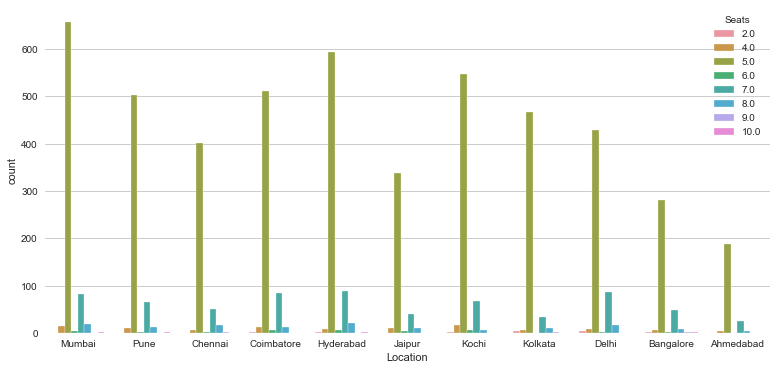

In [48]:
plot(df, 'Location', 'Seats')

The visualization indicates that a majority of car users prefer 5-seater vehicles, followed by for 6-seater cars.

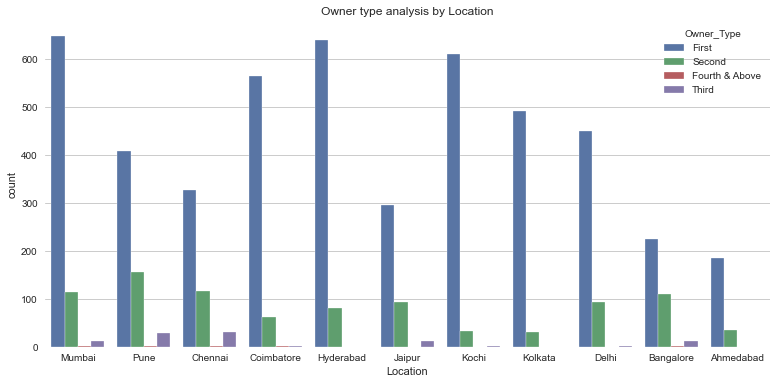

In [49]:
plot(df, 'Location', 'Owner_Type', title='Owner type analysis by Location')

### Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution

In [50]:
# List of numerical features to be transformed
num_features = ['Year', 'Kilometers_Driven', 'Seats', 'New_Price', 'Price']

# Loop through the numerical features and apply the logarithm transformation
for feature in num_features:
    df[feature] = np.log(df[feature])

In [51]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Name
0,Mumbai,7.605890,11.184421,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,1.609438,1.706565,0.559616,Maruti
1,Pune,7.608374,10.621327,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,1.609438,2.776332,2.525729,Hyundai
2,Chennai,7.606387,10.736397,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,1.609438,2.152924,1.504077,Honda
3,Chennai,7.606885,11.373663,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,1.945910,2.422144,1.791759,Maruti
4,Coimbatore,7.607381,10.613246,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,1.609438,3.972930,2.875822,Audi


In [52]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [53]:
#To extract the numeric value from the Mileage, Engine, Power
import re
data = df
df = pd.DataFrame(data)

# Function to extract numeric parts using regular expressions
def extract_numeric(text):
  match = re.search(r"(\d+(?:\.\d+)?)", text)
  return float(match.group(1)) if match else None

# Update the 'Mileage', 'Engine' and 'Power' columns with extracted numeric parts (in-place modification)
for col in ['Mileage', 'Engine', 'Power']:
  df[col] = df[col].apply(extract_numeric)

In [54]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Name
0,Mumbai,7.605890,11.184421,CNG,Manual,First,26.60,998.0,58.16,1.609438,1.706565,0.559616,Maruti
1,Pune,7.608374,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,1.609438,2.776332,2.525729,Hyundai
2,Chennai,7.606387,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,1.609438,2.152924,1.504077,Honda
3,Chennai,7.606885,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,1.945910,2.422144,1.791759,Maruti
4,Coimbatore,7.607381,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,1.609438,3.972930,2.875822,Audi


### For the machine learning

<AxesSubplot:>

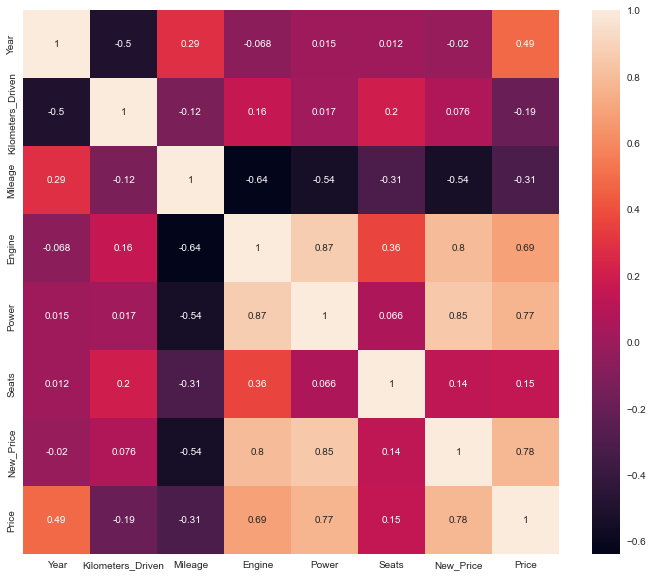

In [55]:
# To check for multicollinearity
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [56]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [57]:
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the categorical features
categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Name']
X_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

In [58]:
# Assuming numerical_cols contains the names of your original numerical features
numerical_cols = ['Year','Kilometers_Driven','Seats','New_Price','Power','Engine','Mileage',]
X_processed = pd.concat([X_encoded, X[numerical_cols]], axis=1)

In [59]:
X_processed

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Car_Name_Others,Car_Name_Toyota,Car_Name_Volkswagen,Year,Kilometers_Driven,Seats,New_Price,Power,Engine,Mileage
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,7.605890,11.184421,1.609438,1.706565,58.16,998.0,26.60
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,7.608374,10.621327,1.609438,2.776332,126.20,1582.0,19.67
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,7.606387,10.736397,1.609438,2.152924,88.70,1199.0,18.20
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,7.606885,11.373663,1.945910,2.422144,88.76,1248.0,20.77
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,7.607381,10.613246,1.609438,3.972930,140.80,1968.0,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,1,0,0,0,0,0,0,...,0,0,0,7.607878,10.217020,1.609438,2.064328,74.00,1248.0,28.40
5868,0,0,0,0,0,1,0,0,0,0,...,0,0,0,7.608374,11.512925,1.609438,2.107786,71.00,1120.0,24.40
5869,0,0,0,0,0,1,0,0,0,0,...,0,0,0,7.606885,10.915088,2.079442,2.457021,112.00,2498.0,14.00
5870,0,0,0,0,0,0,0,1,0,0,...,0,0,0,7.607381,10.736397,1.609438,1.706565,67.10,998.0,18.90


In [60]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.2,random_state=0)

In [61]:
X_train.shape,X_test.shape

((4697, 34), (1175, 34))

In [62]:
#Train Test Split
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
# To check for multicollinearity
#plt.figure(figsize=(12,10))
#corr=df.corr()
#sns.heatmap(corr,annot=True)

In [64]:
# convert all categorical features to numerical data: OneHotEncoding
#X = pd.get_dummies(X, drop_first = True)

#X.head()
#from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the categorical features
#categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Car_Name']
#X_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

In [65]:
# Assuming numerical_cols contains the names of your original numerical features
#X_processed = pd.concat([X_encoded, X[numerical_cols]], axis=1)

### Feature Scaling Or Standardization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### To Build the model Linear regression

In [67]:
#Build linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

#build the model
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

### The perfomance model check

In [72]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    mse= mean_squared_error(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "MSE":mse,
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [73]:
lin_reg_training = model_performance_regression(lin_reg,X_train_scaled, y_train)

lin_reg_training 

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.05338,0.231042,0.164567,0.928149,0.927625,inf


In [74]:
lin_reg_testing = model_performance_regression(lin_reg,X_test_scaled,y_test)

lin_reg_testing

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.047738,0.218491,0.163824,0.937075,0.935198,inf
